In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 그래프 설정
plt.rcParams['figure.figsize'] = (5, 3)        # (가로,세로) 인치 단위
plt.rcParams['axes.unicode_minus'] = False    # 그래프 눈금 값에서 (-)숫자표시
plt.rcParams['lines.linewidth'] = 2            # 선 굵기
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 사용  (AppleGothic)

##사용할 데이터를 읽음
data = pd.read_csv('제주특별자치도_주요관광지점입장객현황_20210630.csv', encoding='cp949')

### 1. 자료의 정리 방법

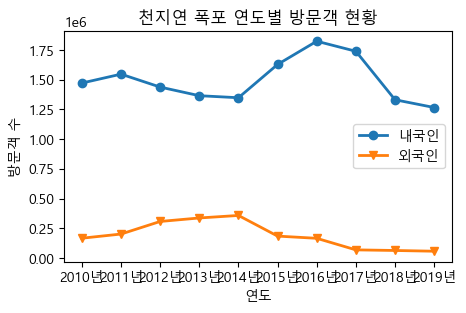

In [42]:
## 1. 꺾은선 그래프

import pandas as pd
import matplotlib.pyplot as plt

df = data.loc[data['관광지']=='천지연폭포']
df = df[['내/외국인구분', '2010년', '2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년']]
df = df.set_index(keys='내/외국인구분')

plt.plot(df.columns, df.values[0], 'o', linestyle='solid', label='내국인', )
plt.plot(df.columns, df.values[1], 'v', linestyle='solid', label='외국인', )

plt.title("천지연 폭포 연도별 방문객 현황")
plt.xlabel('연도')
plt.ylabel('방문객 수')
plt.legend()

plt.show()

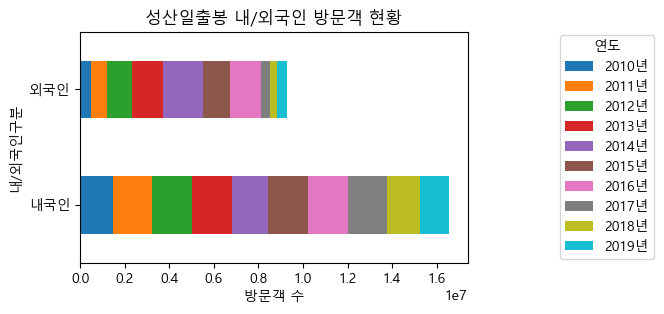

In [43]:
## 2. 비율 그래프

import pandas as pd
import matplotlib.pyplot as plt

df = data.loc[data['관광지']=='성산일출봉']
df = df[['내/외국인구분', '2010년', '2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년']]
df = df.set_index(keys='내/외국인구분')

df.plot(kind='barh', stacked=True, title="성산일출봉 내/외국인 방문객 현황")
plt.legend(df.columns, title='연도', loc="center right",  
           bbox_to_anchor=(1, 0, 0.5, 1))  #bbox_to_anchor=(x0, y0, width, height)
plt.xlabel('방문객 수')

plt.show()

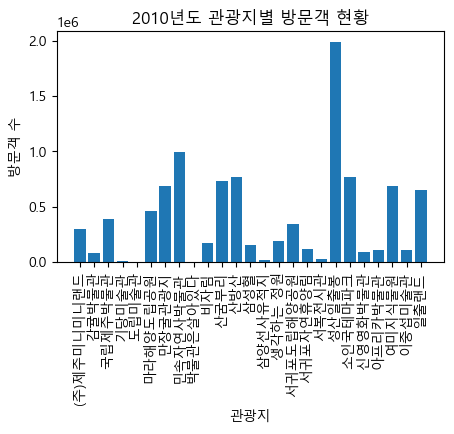

In [44]:
## 3. 막대 그래프

import pandas as pd
import matplotlib.pyplot as plt

df = data[['관광지', '2010년']]
df = df.groupby('관광지').sum().head(25)
df = df.T

plt.bar(df.columns, df.values[0])
plt.xticks(rotation=90)
plt.title("2010년도 관광지별 방문객 현황")
plt.xlabel('관광지')
plt.ylabel('방문객 수')
plt.show()

### 2. 대푯값

In [45]:
from scipy. stats import mode
import numpy as np

##연산이 용이하도록 관광지별 내/외국인 방문객 수를 합함
df = data[['관광지', '2010년', '2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년']]
df = df.groupby('관광지').sum()
x = df['2010년'].to_list() + df['2011년'].to_list() + df['2012년'].to_list() + df['2013년'].to_list() + df['2014년'].to_list() + df['2015년'].to_list() + df['2016년'].to_list() + df['2017년'].to_list() + df['2018년'].to_list() + df['2019년'].to_list()

## 1. 평균
print("<2010년~2019년 방문객 평균>")
print(sum(x)/len(x))
print()

## 2. 중앙값
print("<2010년~2019년 방문객 중앙값>")
print(np.median(x))
print()

## 3. 최빈값
print("<2010년~2019년 방문객 최빈값>")
print("순서대로 최빈값과 집계 횟수이다.")
print(mode(x, keepdims=1))

<2010년~2019년 방문객 평균>
375451.97872340423

<2010년~2019년 방문객 중앙값>
144027.0

<2010년~2019년 방문객 최빈값>
순서대로 최빈값과 집계 횟수이다.
ModeResult(mode=array([0]), count=array([125]))


### 3. 산포도

In [52]:
import numpy as np
import pandas as pd
import scipy.stats as stats

df = data[['관광지', '2010년', '2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년']]
df = df.groupby('관광지').sum()
x = df['2010년'].to_list() + df['2011년'].to_list() + df['2012년'].to_list() + df['2013년'].to_list() + df['2014년'].to_list() + df['2015년'].to_list() + df['2016년'].to_list() + df['2017년'].to_list() + df['2018년'].to_list() + df['2019년'].to_list()

x_ = np.mean(x)
IQR = np.quantile(x,0.75)-np.quantile(x,0.25)
var = np.var(x, 0)
std = np.std(x)
cov =  std / x_ * 100
skew = stats.skew(x)
kurt = stats.kurtosis(x)

print("<관광객 수에 대한 산포도>")
print("사분위수 범위: ", round(IQR, 5))
print("분산: ", round(var, 5) )
print("표준편차: ", round(std, 5) )
print("변동계수: ", round(cov, 5))
print("왜도: ", round(skew, 5) )
print("첨도: ", round(kurt, 5) )

<관광객 수에 대한 산포도>
사분위수 범위:  565640.75
분산:  287098737708.0719
표준편차:  535815.95507
변동계수:  142.71225
왜도:  2.41278
첨도:  7.50972


### 4. 도수분포표

In [61]:
## 3. 도수표

import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def makeFrequencyTable(datas, k=5):
    # 도수분포표 만들기 사전 과정
    # k = 5                       # 1.계급 수
    R = round(max(datas) - min(datas), 6) # 2.R : 최대측정값 - 최소측정값
    w = math.ceil(R/k)          # 3.계급 간격
    s = min(datas) - 0.5        # 4.시작 계급값
    bins = np.arange(s, max(datas)+w+1, step=w)  #계급
    index = [f'{bins[i]} ~ {bins[i+1]}' for i in range(len(bins)) if i<(len(bins)-1) ] # 계급 구간(index)
    hist, bins = np.histogram(datas, bins)  # 계급 구간별 도수 데이터

    # 도수분포표 만들기
    df = pd.DataFrame(hist, index=index, columns=['도수'])
    df.index.name = '계급간격'

    df['상대도수'] = [x/sum(hist) for x in hist]
    df['누적도수'] = [sum(hist[:i+1]) if i>0 else hist[i] for i in range(k)]
    df['누적상대도수'] = [sum(df['상대도수'].values[:i+1]) if i>0 else df['상대도수'].values[i] for i in range(k)] 
    df['계급값'] = [ (bins[x]+bins[x+1])/2 for x in range(k)]

    return df

# 도수분포표 만들기
df = data[['관광지', '2010년', '2011년', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년']]
df = df.groupby('관광지').sum()
x = df['2010년'].to_list() + df['2011년'].to_list() + df['2012년'].to_list() + df['2013년'].to_list() + df['2014년'].to_list() + df['2015년'].to_list() + df['2016년'].to_list() + df['2017년'].to_list() + df['2018년'].to_list() + df['2019년'].to_list()

result = makeFrequencyTable(x, k=10)
print("<관광객 수에 대한 도수분포표>")
result

<관광객 수에 대한 도수분포표>


,도수,상대도수,누적도수,누적상대도수,계급값
계급간격,,,,,
-0.5 ~ 340495.5,303,0.644681,303,0.644681,170247.5
340495.5 ~ 680991.5,68,0.144681,371,0.789362,510743.5
680991.5 ~ 1021487.5,56,0.119149,427,0.908511,851239.5
1021487.5 ~ 1361983.5,15,0.031915,442,0.940426,1191735.5
1361983.5 ~ 1702479.5,9,0.019149,451,0.959574,1532231.5
1702479.5 ~ 2042975.5,12,0.025532,463,0.985106,1872727.5
2042975.5 ~ 2383471.5,1,0.002128,464,0.987234,2213223.5
2383471.5 ~ 2723967.5,1,0.002128,465,0.989362,2553719.5
2723967.5 ~ 3064463.5,2,0.004255,467,0.993617,2894215.5
